In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from sklearn.impute import SimpleImputer
from scipy import stats 
from math import pi

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,confusion_matrix, precision_recall_curve, auc, roc_auc_score,roc_curve,recall_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [130]:
data = pd.read_csv('DataSet.csv', delimiter =';', header=None)
data.columns = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','y']
data.head(5)

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,y
0,b,"30,83",0,u,g,w,v,"1,25",t,t,1,f,g,202,0,+
1,a,"58,67","4,46",u,g,q,h,"3,04",t,t,6,f,g,43,560,+
2,a,"24,5","0,5",u,g,q,h,"1,5",t,f,0,f,g,280,824,+
3,b,"27,83","1,54",u,g,w,v,"3,75",t,t,5,t,g,100,3,+
4,b,"20,17","5,625",u,g,w,v,"1,71",t,f,0,f,s,120,0,+


  - replace koma(,) dengan titik(.) & (?) menjadi NaN

In [131]:
for h in [1,2,7,13]:
    for i in np.arange(690):
        x = data.iloc[i,h]
        x = x.replace(',','.')

        if x =='?':
            data.iloc[i,h] = np.nan
        else:
            xnew = float(x.replace(',','.'))
            data.iloc[i,h] = xnew
        
data = data.replace('?', np.nan)

In [132]:
#banyak data null
len(data[data.isnull().any(axis=1)])

37

In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
A    678 non-null object
B    678 non-null float64
C    690 non-null float64
D    684 non-null object
E    684 non-null object
F    681 non-null object
G    681 non-null object
H    690 non-null float64
I    690 non-null object
J    690 non-null object
K    690 non-null int64
L    690 non-null object
M    690 non-null object
N    677 non-null float64
O    690 non-null int64
y    690 non-null object
dtypes: float64(4), int64(2), object(10)
memory usage: 86.3+ KB


# PAIRPLOT

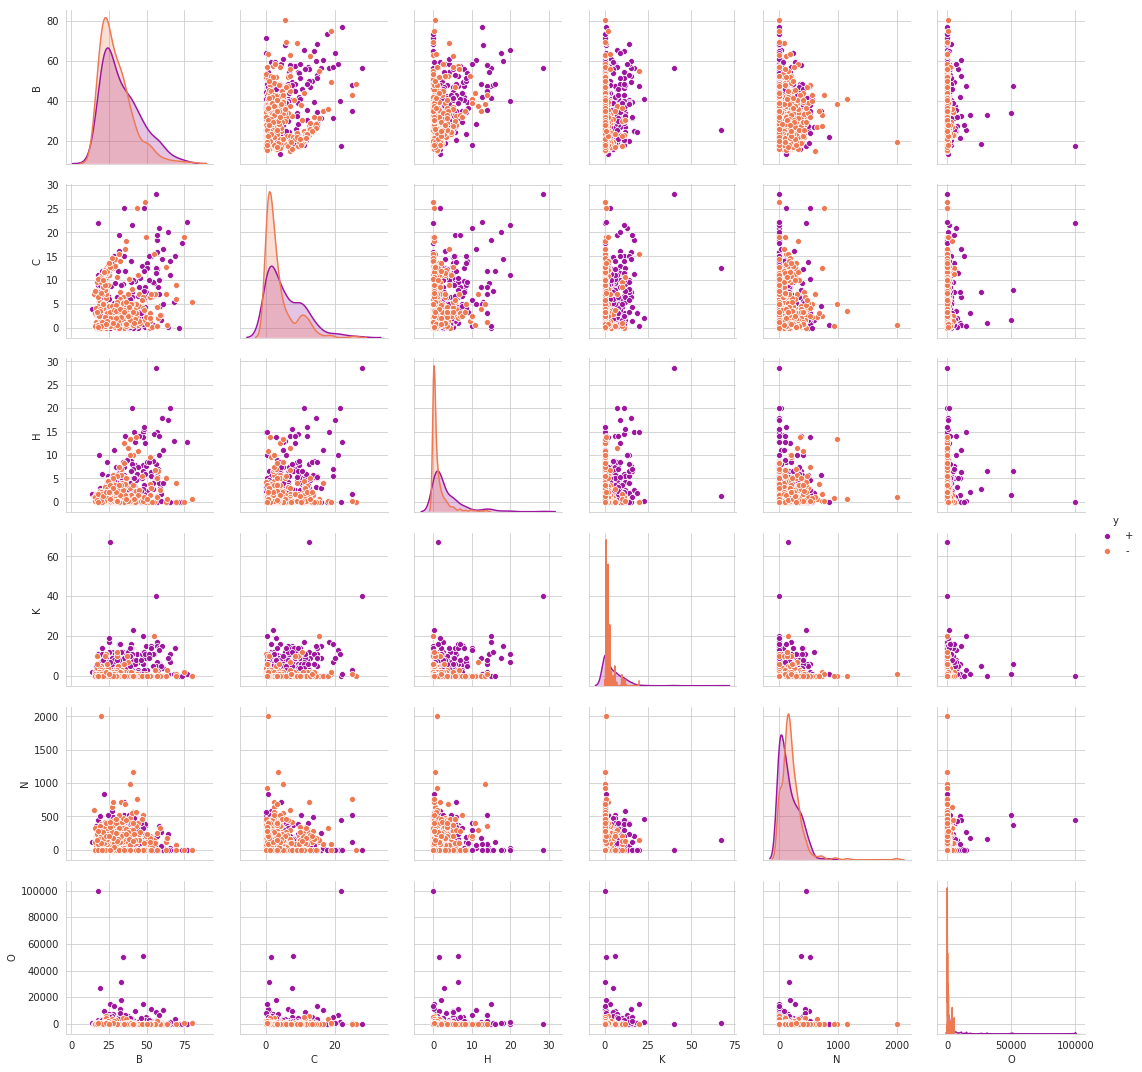

In [134]:
g = sns.pairplot(data, vars=['B','C','H','K','N','O'],hue='y', palette="plasma")
plt.show()

# BOXPLOT
coloring by target 'y' (+,-)

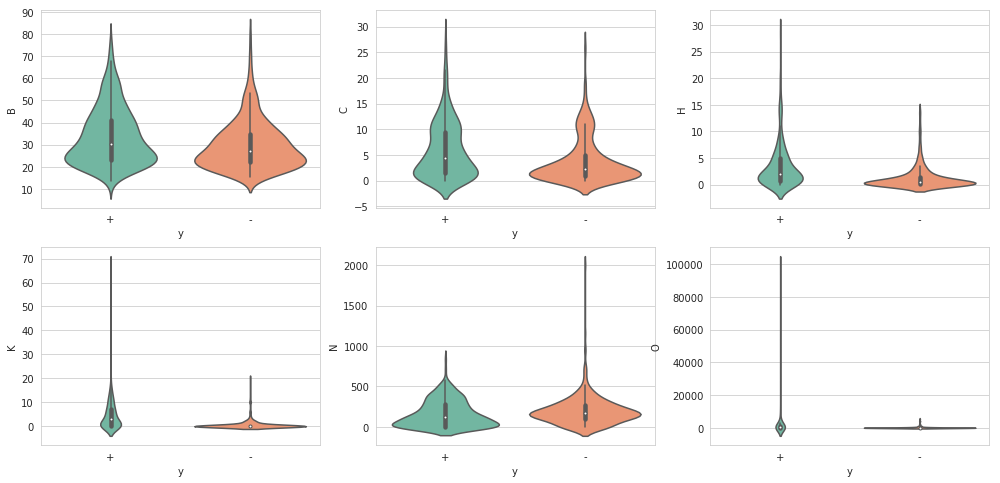

In [135]:
#[1,2,7,10,13,14]
sns.set_style('whitegrid')
f, axes = plt.subplots(2,3, figsize=(17,8)) #1row 2 colums

vis1 = sns.violinplot(data=data, y=data.iloc[:,1], x=data.iloc[:,-1], ax=axes[0,0],palette="Set2")
vis2 = sns.violinplot(data=data, y=data.iloc[:,2], x=data.iloc[:,-1],ax=axes[0,1],palette="Set2")
vis3 = sns.violinplot(data=data, y=data.iloc[:,7], x=data.iloc[:,-1],ax=axes[0,2],palette="Set2")
vis4 = sns.violinplot(data=data, y=data.iloc[:,10], x=data.iloc[:,-1],ax=axes[1,0],palette="Set2")
vis5 = sns.violinplot(data=data, y=data.iloc[:,13], x=data.iloc[:,-1],ax=axes[1,1],palette="Set2")
vis6 = sns.violinplot(data=data, y=data.iloc[:,14], x=data.iloc[:,-1],ax=axes[1,2],palette="Set2")
plt.show()

# KDEPLOT

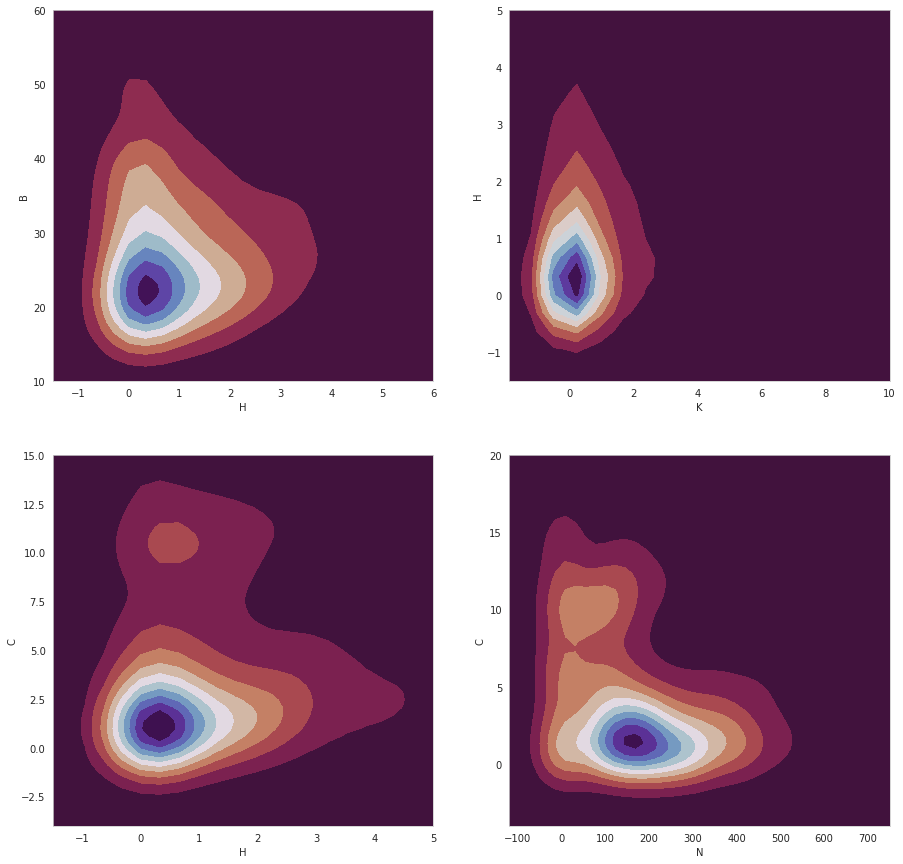

In [136]:
#[1,2,7,10,13,14]
#['B','C','H','K','N','O']
#4 Korelasi tertinggiz
#HB,KH,HC,NC

f, axes = plt.subplots(2,2, figsize=(15,15)) #sharex, sharey = True
datadropNA = data.copy()
datadropNA = datadropNA.dropna()
vis1 = sns.kdeplot(datadropNA.H, datadropNA.B,ax=axes[0,0],cmap='twilight_shifted_r',shade=True, shade_lowest=True)
vis2 = sns.kdeplot(datadropNA.K, datadropNA.H,ax=axes[0,1],cmap='twilight_shifted_r',shade=True, shade_lowest=True)
vis3 = sns.kdeplot(datadropNA.H, datadropNA.C,ax=axes[1,0],cmap='twilight_shifted_r',shade=True, shade_lowest=True)
vis4 = sns.kdeplot(datadropNA.N, datadropNA.C,ax=axes[1,1],cmap='twilight_shifted_r',shade=True, shade_lowest=True)

vis1.set(xlim=(-1.5,6))
vis1.set(ylim=(10,60))

vis2.set(xlim=(-1.9,10))
vis2.set(ylim=(-1.5,5))

vis3.set(xlim=(-1.5,5))
vis3.set(ylim=(-4,15))

vis4.set(xlim=(-120,750))
vis4.set(ylim=(-4,20))

plt.show()

# RADAR

In [137]:
#MAXIMUM
maxdata = data.groupby('y').max().loc[:,['B','C','H','K','N','O']]
maxdata.loc[maxdata.index== '+' ,'group'] = 'Pmax'
maxdata.loc[maxdata.index== '-' ,'group'] = 'Nmax'

#RATARATA
meandata = data.groupby('y').mean()
meandata.loc[meandata.index== '+' ,'group'] = 'Pmean'
meandata.loc[meandata.index== '-' ,'group'] = 'Nmean'

#GROUPING
df = maxdata.append([meandata]).iloc[:,[-1,0,1,2,3,4,5]]
df =  df.reset_index()
df = df.iloc[:,1:]
df

,group,B,C,H,K,N,O
0,Pmax,76.750000,28.000000,28.500000,67.000000,840.000000,100000.000000
1,Nmax,80.250000,26.335000,13.875000,20.000000,2000.000000,5552.000000
2,Pmean,33.720492,5.904951,3.427899,4.605863,164.421927,2038.859935
3,Nmean,29.808231,3.839948,1.257924,0.631854,199.699468,198.605744


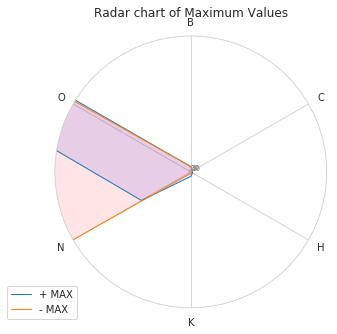

In [138]:
# ------- Create background 
categories=list(df)[1:]
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
ax = plt.subplot(111, polar=True)
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,2000)

# ------- Add plots
#Positive
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="+ MAX")
ax.fill(angles, values, 'b', alpha=0.1)
#Negative
values=df.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="- MAX")
ax.fill(angles, values, 'r', alpha=0.1)
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title('Radar chart of Maximum Values')
plt.show()

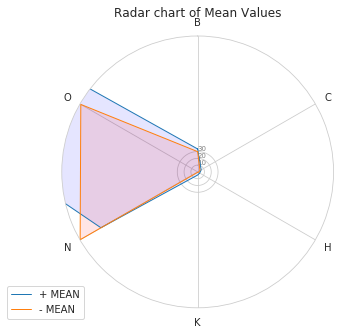

In [139]:
# ------- Create background
categories=list(df)[1:]
N = len(categories)
 
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,200)

# ------- Add plots
#Positif
values=df.loc[2].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="+ MEAN")
ax.fill(angles, values, 'b', alpha=0.1)
#Negative
values=df.loc[3].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="- MEAN")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title('Radar chart of Mean Values')
plt.show()

# TAKE CARE OF MISSING VALUES


# 1.correlation between categorical & numerical

setelah menerapkan cara untuk menemukan hubungan antara seluruh variabel bertipe data numerik dengan tiap variabel bertipe data kategorik, ditemukan korelasi tertinggi terdapat pada variabel kategori 'J' dengan variabel 'K'. Maka untuk tahap pengisian data null kali ini tidak berpacu pada korelasi antara kategori & numerik dikarenakan kecilnya nilai korelasi tersebut.

In [140]:
dataDum = data.copy()
dataDum = dataDum.dropna()
dataCont = dataDum.loc[:,['B','C','H','K','N','O']]
#A,D,E,F,G,I,J,L,M

In [141]:
dataDummies = pd.get_dummies(dataDum['J'])
dataJ = pd.concat([dataCont,dataDummies],axis=1)
Jcorrelations = dataJ.corr().iloc[:6,[-2,-1]]

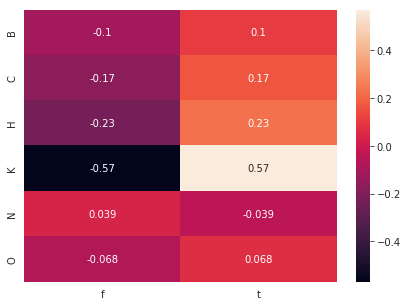

In [142]:
sns.heatmap(Jcorrelations,annot=True)
plt.show()

# 2.correlation between numerical by median 
(depend on other feature for evaluation change to be the outlier or not)

untuk mengisi nilai null bukan dengan nilai outlier, maka dibutuhkan feature lain untuk membandingkan. feature lain yg digunakan sebagai acuan adalah feature yang memiliki korelasi tertinggi dengan feature missing value tsb. 

mengisi nilai null akan lebih baik jika menggunakan nilai median jika data yang dimiliki tidak berdistribusi normal. karena nilai median merupakan perhitungan berdasarkan nilai tengah dari satu distribusi. sedangkan nilai rata-rata merupakan perhitungan berdasarkan seluruh point/nilai pada satu distribusi. sehingga diharapkan nilai baru yang dibentuk bukan suatu outlier.

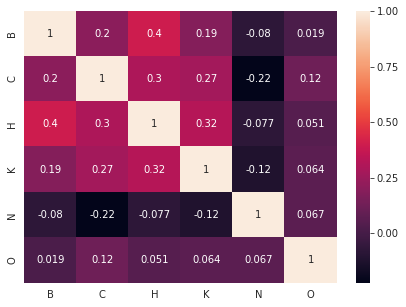

In [143]:
#Missing Data #B,N #A,D,E,F,G 
plt.rcParams['figure.figsize']=7,5
sns.heatmap(data.corr(),annot=True)
plt.show()

### imput missing value feature (B) & visualize with feature H

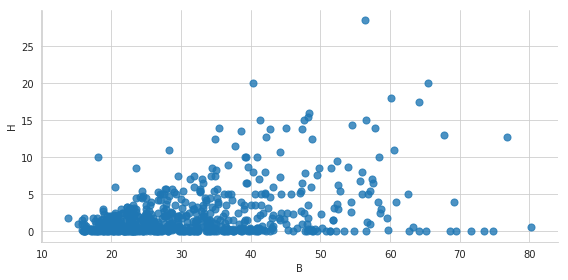

In [144]:
#before input missing data
sns.set_style('whitegrid')
sns2 = sns.lmplot(data=data, x='B',y='H',fit_reg=False, size=4, scatter_kws={'s':50},aspect=2)

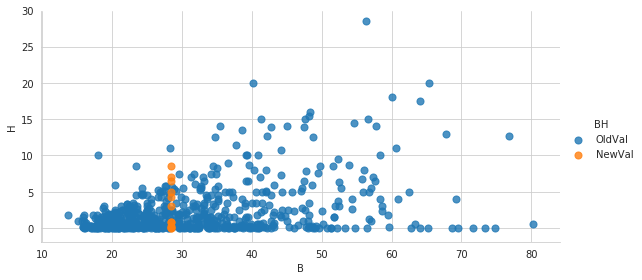

In [145]:
#NEW DATA
corrBnH = data.copy()
corrBnH.loc[corrBnH['B'].isnull(), 'BH'] = 'NewVal'
corrBnH.loc[corrBnH['B'].notnull(), 'BH'] = 'OldVal'

imp = SimpleImputer(missing_values=np.nan, strategy='median')
X = corrBnH['B'].values.reshape(-1,1)
imp.fit(X)
corrBnH['B'] = imp.transform(X)
data['B'] = imp.transform(X)

sns.set_style('whitegrid')
sns2 = sns.lmplot(data=corrBnH, x='B',y='H',  hue='BH',fit_reg=False, size=4, scatter_kws={'s':50},aspect=2)
#it doesn't looks like outlier. so go ahead

### imput missing value feature (N) & visualize with feature C

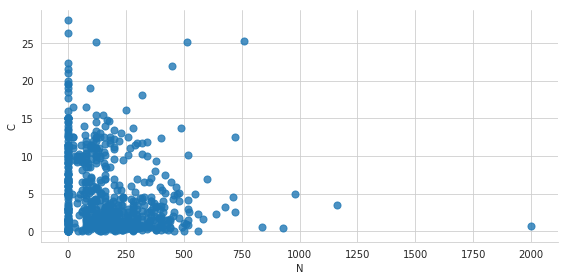

In [146]:
#before input missing data
sns.set_style('whitegrid')
sns2 = sns.lmplot(data=data, x='N',y='C', fit_reg=False, size=4, scatter_kws={'s':50},aspect=2)

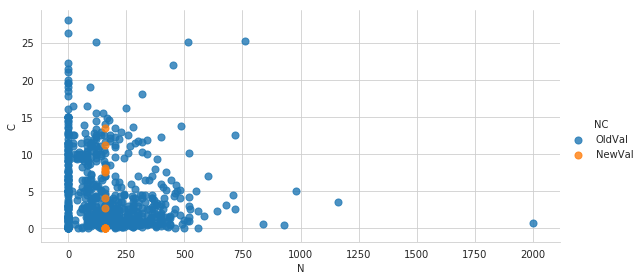

In [78]:
#NEW DATA
corrNC = data.copy()
corrNC.loc[corrNC['N'].isnull(), 'NC'] = 'NewVal'
corrNC.loc[corrNC['N'].notnull(), 'NC'] = 'OldVal'

imp = SimpleImputer(missing_values=np.nan, strategy='median')
X = corrNC['N'].values.reshape(-1,1)
imp.fit(X)
corrNC['N'] = imp.transform(X)
data['N'] = imp.transform(X)

sns.set_style('whitegrid')
sns2 = sns.lmplot(data=corrNC, x='N',y='C',  hue='NC', fit_reg=False, size=4, scatter_kws={'s':50},aspect=2)
#it doesn't looks like outlier. so go ahead

# 3.correlation between categorical by mode 
(depend on othe categorical feature to get mode in each category)

In [79]:
#Missing Data #B,N
#A,D,E,F,G

### Kategorik & Kategorik:

Untuk menentukan hubungan antara 2 variabel kategorik digunakan metode berikut:

* **Two-way table**: Baris merupakan nilai dari satu variabel dan kolom merupakan nilai dari variabel yang lain. 
* **Stacked Column Chart**: Merupakan visualisasi dari 2-way table.
* **Chi-Square Test**: Untuk menentukan seberapa signifikan hubungan antara 2 variabel kategorik.
    
        pvalue > significant Level         : Independent, gd korelasi 
        chi_squared_stat < Critical value  : independent, gd korelasi 

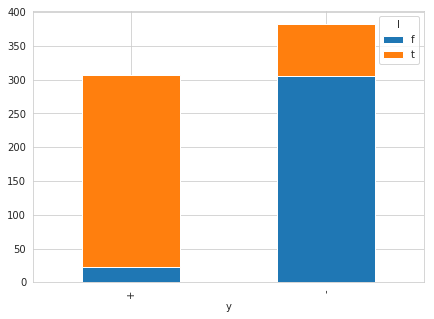

In [88]:
#Stack Column Chart dari two-way table
temp = pd.crosstab(data.y, data.I)
temp.plot.bar(stacked=True)
plt.show()

# Bivariate Function for categorical data
#####  chi_squared_stat < Critical value, make kedua variabel TIDAK berkorelasi

In [89]:
def bivariateAn(data1,data2):
    
    crosstab = pd.crosstab(data1, data2, margins = True)
    crosstab.rename(columns={'All':'row_totals'}, inplace=True)
    crosstab.rename(index={'All':'col_totals'}, inplace=True)
    
    observed = crosstab.iloc[:-1,:-1]
    
    col_names = list(observed.columns)
    index_names = list(observed.index)
    
    expected =  np.outer(crosstab["row_totals"][0:-1],crosstab.loc["col_totals"][0:-1]) / crosstab.iloc[-1,-1]
    expected = pd.DataFrame(expected)
    expected.columns = col_names
    expected.index = index_names
    
    chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
    crit = stats.chi2.ppf(q = 0.95,df = 1) #Critical value
    p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,df=1)

    
    if chi_squared_stat<crit:
        corr='There is NO correlation'
    else: 
        corr='There is correlation'
        
    return(corr,chi_squared_stat,crit)

In [90]:
AllChis = {}
AllCrit = {}
AllCorr = {}
list1 = ['A','D','E','F','G','I','J','L','M','y']     
for k in np.arange(10) :
    i = list1[k]
    listValChis = []
    listValCrit = []
    listValCorr = []
    for j in ['A','D','E','F','G','I','J','L','M','y']:
        corr,chis,crit=bivariateAn(data[i], data[j])
        listValChis.append(chis)
        listValCrit.append(crit)
        listValCorr.append(corr)
    
    AllChis['{}'.format(list1[k])] = listValChis
    AllCrit['Crirical{}'.format(list1[k])] = listValCrit
    AllCorr['Correlation{}'.format(list1[k])] = listValCorr
    
    # pd.DataFrame({'i':'i','j':j,'ChiSquared':AllChiS,'CriticalVal':AllCrit})

In [91]:
keyslist = list(AllChis.keys())
chisquaredStat = pd.DataFrame()
for a in np.arange(10):
    chisquaredStat[keyslist[a]] = AllChis[keyslist[a]]
chisquaredStat.index=keyslist

#change looks like matrix identity
for x in np.arange(0,10):
    chisquaredStat.iloc[x,x] = 0
chisquaredStat

,A,D,E,F,G,I,J,L,M,y
A,0.000000,3.552519,3.552519,86.312337,30.971931,0.217922,3.758229,1.926725,4.772124,0.411435
D,3.552519,0.000000,1368.000000,34.910343,182.138218,16.889822,22.903245,2.336016,175.879282,26.234075
E,3.552519,1368.000000,0.000000,34.910343,182.138218,16.889822,22.903245,2.336016,175.879282,26.234075
F,86.312337,34.910343,34.910343,0.000000,1894.170671,72.912103,54.303497,23.239002,57.484745,98.325203
G,30.971931,182.138218,182.138218,1894.170671,0.000000,49.906730,10.998715,16.422711,178.011346,45.034207
I,0.217922,16.889822,16.889822,72.912103,49.906730,0.000000,128.789855,5.748573,15.336296,358.100326
J,3.758229,22.903245,22.903245,54.303497,10.998715,128.789855,0.000000,0.200415,42.725838,144.927676
L,1.926725,2.336016,2.336016,23.239002,16.422711,5.748573,0.200415,0.000000,3.830849,0.690089
M,4.772124,175.879282,175.879282,57.484745,178.011346,15.336296,42.725838,3.830849,0.000000,9.191570
y,0.411435,26.234075,26.234075,98.325203,45.034207,358.100326,144.927676,0.690089,9.191570,0.000000


In [92]:
chisquaredStat.max()

A      86.312337
D    1368.000000
E    1368.000000
F    1894.170671
G    1894.170671
I     358.100326
J     144.927676
L      23.239002
M     178.011346
y     358.100326
dtype: float64

dilihat dari hasil chisquared, y memiliki hubungan paling besar dari I. begitupun sebaliknya. I dan J paling banyak memiliki hubungan dengan y. untuk analisa kita dapat menggunakan statement tersebut. tapi untuk mengisi nilai null pada I dan J kita perlu mencari feature yang lain. karena y adalah variable dependen. sehingga tidak bisa digunakan sebagai acuan dalam mengisi nilai null pada data

dengan mempertimbangkan nilai chisquaredStat> critical value dan dengan nilai tertinggi, serta perhitungan terhadap korelasi dari tiap feature (contoh: korelasi tertinggi D dg E,namun karena kedua feature tersebut memiliki data null yg pada index yang persis sama, maka korelasi D diganti dengan M, yang merupakan korelasi tertinggi ke3, karena korelasi tertinggi ke2 ada pada G, namun nilai G dan D juga null pada index yang sama) berikut korelasi yang diterapkan untuk mendapatkan mode pada tiap kategori.


In [93]:
#A,D,E,F,G #THESeNULL
#A,D,E,F,G,I,J,L,M

#tofeature - fromfeature
# 1.7.#A-F >>>---->>(2.A-F)
# 2.  #D-E(D-M)>>>>>
# 3.  #E-D >>>>> 
# 4.6.#F-G(F-A)>>>---->>(1.F-I)
# 5.8.#G-F >>>---->>(3.G-F)

# nomor (1,7),(4,6),(5,8) dilakukan replacenull 2x, karena pada prosess replacenull yg pertama masih menyisakan nilai null
# disebabkan feature dependentnya juga null. contoh: 1.7, replace datanull A dg data F. setelah F replacenull dari data I, 
# data A di replacenull lagi

In [94]:
def replaceNullMode(tofeature, fromfeature):
    
    cekMode = data.groupby(fromfeature).apply(lambda x: x.mode().iloc[0])
    lenCekMode = len(cekMode)
    listNilaiTO = list(cekMode[tofeature])
    
    for i in np.arange(lenCekMode):
        nilai1 = cekMode.index[i]
        nilai2 = listNilaiTO[i]
        data.loc[(data[fromfeature]==nilai1)&(data[tofeature].isnull()),tofeature] = nilai2

In [95]:
#replaceNullMode(tofeature, fromfeature)
replaceNullMode('A','F') 
replaceNullMode('D','M')
replaceNullMode('E','D')
replaceNullMode('F','A')
replaceNullMode('G','F')
replaceNullMode('F','I')
replaceNullMode('A','F')
replaceNullMode('G','F')

In [96]:
data.info()
#there is no missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
A    690 non-null object
B    690 non-null float64
C    690 non-null float64
D    690 non-null object
E    690 non-null object
F    690 non-null object
G    690 non-null object
H    690 non-null float64
I    690 non-null object
J    690 non-null object
K    690 non-null int64
L    690 non-null object
M    690 non-null object
N    690 non-null float64
O    690 non-null int64
y    690 non-null object
dtypes: float64(4), int64(2), object(10)
memory usage: 86.3+ KB


# LABELENCODER & ONEHOTENCODER

Karena Data tidak diketahui kategori dengan level (tdk puas(0), puas(1), sangat puas(2))
atau tanpa adanya level (lk(0), pr(1))
maka preprocessing preprocessing berikut ini menganggap data berkategori tanpa ada level
sehingga harus diterapkan dummies pada tiap variable kategorik

categorical data dengan 2 category = A,I,J,L,y (ga perlu di dummy. cukup di encoding)

In [99]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [100]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoderA = LabelEncoder()
X[:,0] = labelencoderA.fit_transform(X[:,0])

labelencoderD = LabelEncoder()
X[:,3] = labelencoderD.fit_transform(X[:,3])

labelencoderE = LabelEncoder()
X[:,4] = labelencoderE.fit_transform(X[:,4])

labelencoderF = LabelEncoder()
X[:,5] = labelencoderF.fit_transform(X[:,5])

labelencoderG = LabelEncoder()
X[:,6] = labelencoderG.fit_transform(X[:,6])

labelencoderI = LabelEncoder()
X[:,8] = labelencoderI.fit_transform(X[:,8])

labelencoderJ = LabelEncoder()
X[:,9] = labelencoderJ.fit_transform(X[:,9])

labelencoderL = LabelEncoder()
X[:,11] = labelencoderL.fit_transform(X[:,11])

labelencoderM = LabelEncoder()
X[:,12] = labelencoderM.fit_transform(X[:,12])

# jangan gunakan y[:].error
labelencodery = LabelEncoder()
y= labelencodery.fit_transform(y)

In [101]:
#GAPERLU DI ONEHOTENCODER = A,I,J,L,y (categorynya cuma 2)
#D,E,F,G,M
#3,

#onehotencoder D 
onehotencoderD = OneHotEncoder(categorical_features = [3])
X = onehotencoderD.fit_transform(X).toarray()
#Avoid dummy variable trap
X = X[:,1:]

#onehotencoder E
onehotencoderE = OneHotEncoder(categorical_features = [5])
X = onehotencoderE.fit_transform(X).toarray()
#Avoid dummy variable trap
X = X[:,1:]

#onehotencoder F
onehotencoderF = OneHotEncoder(categorical_features = [7])
X = onehotencoderF.fit_transform(X).toarray()
#Avoid dummy variable trap
X = X[:,1:]

#onehotencoder G
onehotencoderG = OneHotEncoder(categorical_features = [20])
X = onehotencoderG.fit_transform(X).toarray()
#Avoid dummy variable trap
X = X[:,1:]

#onehotencoder M
onehotencoderM = OneHotEncoder(categorical_features = [33])
X = onehotencoderM.fit_transform(X).toarray()
#Avoid dummy variable trap
X = X[:,1:]


#untuk mempermudah update kolom, cek posisi kolom terbaru 
#setelah dilakukan dummy variabel untuk setiap categorical feature yg memiliki > 2 category
cekdata = pd.DataFrame(X)

# SPLITTING DATA
dilakukan sebelum scaling. KARENA, splitting data adalah salah satu cara untuk meningkatkan performance dari model yg dihasilkan dengan cara mengujinya pada data test hasil split data.

dalam model, kita akan menggunakan data test&train yang berbeda. oleh sebab itu, scaling data . yang dilakukan harus berdasarkan data yang digunakan dalam masing-masing proses. baik training dan testing.

split data dilakukan 2 kali untuk menghasilkan 3 dataset, sbb:
        1. train data - get optimum model
        2. validation data - get optimum value of params
        3. test data - evaluation
        
karena ini merupakan masalah klasifikasi, maka split data dilakukan secara stratified agar menghasilkan model yg lebih optimal

In [102]:
from sklearn.model_selection import train_test_split 
#Test Data
Xtraindata, Xtest, ytraindata, ytest = train_test_split(X,y,test_size=0.2,random_state = 0,stratify=y)
#Train & Val
Xtrain, Xval, ytrain, yval = train_test_split(Xtraindata,ytraindata,test_size=0.1,random_state = 0,stratify=ytraindata)

# FEATURE SCALING untuk tiap train,val,test data

untuk menghasilkan feature dalam satu skala  yang serupa dan tidak dipengaruhi oleh outlier bisa menggunakan RobustScaler. RobustScaler melakukan scaling data berdasarkan kuartil data. berikut formula dari robust scaler:
                        (Xi - Q2) / (Q3 -Q1)

In [103]:
from sklearn.preprocessing import RobustScaler
robustscaler = RobustScaler()
Xtrain = robustscaler.fit_transform(Xtrain)
Xval = robustscaler.transform(Xval)
Xtest = robustscaler.transform(Xtest)

# MODEL SELECTION

# Learning Curve 
find the best number of TrainData using error of data train(when modelling), and data val (when gridsearch) 

In [104]:
def LearningCurve(XtrainLC,ytrainLC,XvalLC,yvalLC):
    classifierRF = RandomForestClassifier()

    classifierRF.fit(XtrainLC, ytrainLC) #ini untuk feature selection, jadi pake Xval&yval

    yvalpredLC = classifierRF.predict(XvalLC)
    cmvalLC = confusion_matrix(yvalLC, yvalpredLC)
    accvalLC = (cmvalLC[0,0] + cmvalLC[1,1])/np.sum(cmvalLC)
    errorvalLC = 1-accvalLC

    ytrainpredLC = classifierRF.predict(XtrainLC)
    cmtrainLC = confusion_matrix(ytrainLC, ytrainpredLC)
    acctrainLC = (cmtrainLC[0,0] + cmtrainLC[1,1])/np.sum(cmtrainLC)
    errortrainLC = 1-acctrainLC
    
    return(errortrainLC,errorvalLC)

In [105]:
def gridsearchCurve(Xval,yval):
    rf = RandomForestClassifier()
    rf_param = {'criterion':('gini', 'entropy'), 'min_samples_leaf':(1, 2, 5),
                'max_features':('auto', 'sqrt', 'log2', None), 
                'min_samples_split':(2, 3, 5, 10, 50, 100), 'bootstrap':('True', 'False')}

    rf_clf = GridSearchCV(rf, rf_param, scoring='accuracy', cv=10)
    rf_clf = rf_clf.fit(Xval, yval)
    best_parameterRF = rf_clf.best_params_
    best_accuracyRF = rf_clf.best_score_
    errorRF = 1-best_accuracyRF
    return(errorRF)

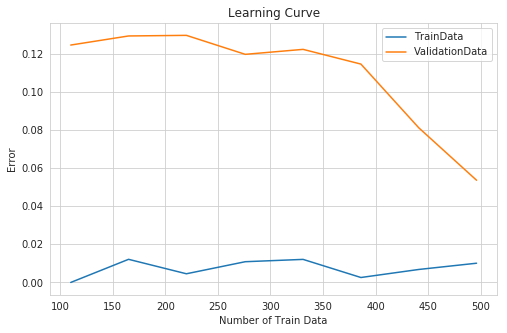

In [106]:
error_train, error_val = [], []
num_valdata_size = np.arange(0.1,0.9,0.1)
num_traindata_size = []
for i in num_valdata_size:
    #Train & Val
    XtrainLC, XvalLC, ytrainLC, yvalLC = train_test_split(Xtraindata,ytraindata,test_size=i,random_state = 0,stratify=ytraindata)    
    errortrainLC,errorvalLC = LearningCurve(XtrainLC, ytrainLC, XvalLC,yvalLC)
    errorValGS = gridsearchCurve(XvalLC,yvalLC)
    
    lendata = len(XtrainLC)
    error_train.append(errortrainLC)
    error_val.append(errorValGS)
    num_traindata_size.append(lendata)
    
#VISUALIZING
plt.figure(figsize=(8,5))
plt.plot(num_traindata_size,error_train,label='TrainData')
plt.plot(num_traindata_size,error_val,label='ValidationData')
plt.legend()
plt.title('Learning Curve')
plt.xlabel('Number of Train Data')
plt.ylabel('Error')
# plt.ylim(0.000,0.5)
plt.grid(True)    

dari curve diatas maka akan dipilih 496 data training & 10% sebagai data validation untuk tahap model selection

In [107]:
num_valdata_size

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])

In [108]:
num_traindata_size

[496, 441, 386, 331, 276, 220, 165, 110]

In [109]:
len(Xtrain)

496

# Grid Search

In [86]:
from sklearn.ensemble import RandomForestClassifier as RF
rf = RF()
rf_param = {'criterion':('gini', 'entropy'), 'min_samples_leaf':(1, 2, 5),
            'max_features':('auto', 'sqrt', 'log2', None), 
            'min_samples_split':(2, 3, 5, 10, 50, 100), 'bootstrap':('True', 'False')}

rf_clf = GridSearchCV(rf, rf_param, scoring='accuracy', cv=10)
rf_clf = rf_clf.fit(Xval, yval)
best_parameterRF = rf_clf.best_params_
best_accuracyRF = rf_clf.best_score_

print('best accuracy in data validation:', best_accuracyRF)
print('\nbest parameters:', best_parameterRF)

best accuracy in data validation: 0.9285714285714286

best parameters: {'bootstrap': 'True', 'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 2}


### RANDOM FOREST

In [123]:
classifierRF = RandomForestClassifier(bootstrap = True,criterion='gini',max_features='sqrt', 
                                      min_samples_leaf=5, min_samples_split= 2, random_state = 0)
classifierRF.fit(Xtrain, ytrain)
# Predicting the Test set results
ypredRF = classifierRF.predict(Xtest)
cmRF = confusion_matrix(ytest, ypredRF)
accRF = (cmRF[0,0] + cmRF[1,1])/np.sum(cmRF)
print('accuracy Random Forest = ', accRF)

accuracy Random Forest =  0.8840579710144928


### DECISION TREE

In [124]:
classifierDT = DecisionTreeClassifier(criterion = 'gini',min_samples_leaf=1, min_samples_split=50)
classifierDT.fit(Xtrain,ytrain)

ypredDT = classifierDT.predict(Xtest)
cmDT = confusion_matrix(ytest, ypredDT)

accDT = (cmDT[0,0] + cmDT[1,1])/np.sum(cmDT)
print('accuracy Decision Tree = ', accDT)

accuracy Decision Tree =  0.8623188405797102


### KNN

In [125]:
classifierKNN = KNeighborsClassifier(algorithm= 'auto',leaf_size=10,n_neighbors=5, p=1, weights='uniform')
classifierKNN.fit(Xtrain, ytrain)
# Predicting the Test set results
ypredKNN = classifierKNN.predict(Xtest)

cmKNN = confusion_matrix(ytest, ypredKNN)
accKNN = (cmKNN[0,0] + cmKNN[1,1])/np.sum(cmKNN)
print('accuracy KNN = ', accKNN)

accuracy KNN =  0.8695652173913043


### SVC

In [126]:
classifierSVC = SVC(kernel = 'rbf',C=10,gamma=0.01)
classifierSVC.fit(Xtrain, ytrain)

# Predicting the Test set results
ypredSVC = classifierSVC.predict(Xtest)

cmSVC = confusion_matrix(ytest, ypredSVC)

accSVC = (cmSVC[0,0] + cmSVC[1,1])/np.sum(cmSVC)
print('accuracy SVC = ', accSVC)

accuracy SVC =  0.855072463768116


## EVALUATION

### ROC & AUC

0.880774962742176


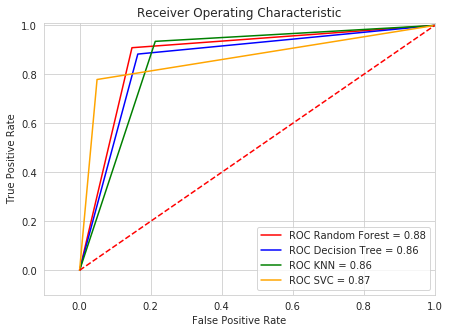

In [147]:
#RANDOM FOREST
fpr, tpr, thresholds = roc_curve(ytest,ypredRF)
roc_auc = auc(fpr,tpr)
#DECISION TREE
fprDT, tprDT, thresholdsDT = roc_curve(ytest,ypredDT)
roc_aucDT = auc(fprDT,tprDT)
#KNN
fprKNN, tprKNN, thresholdsKNN = roc_curve(ytest,ypredKNN)
roc_aucKNN = auc(fprKNN,tprKNN)
#SVC
fprSVC, tprSVC, thresholdsSVC = roc_curve(ytest,ypredSVC)
roc_aucSVC = auc(fprSVC,tprSVC)

print(roc_auc)
# Plot ROC
plt.title('Receiver Operating Characteristic')

plt.plot(fpr, tpr, 'b',label='ROC Random Forest = %0.2f'% roc_auc, color='red')
plt.plot(fprDT, tprDT, 'b',label='ROC Decision Tree = %0.2f'% roc_aucDT,color='blue')
plt.plot(fprKNN, tprKNN, 'b',label='ROC KNN = %0.2f'% roc_aucKNN,color='green')
plt.plot(fprSVC, tprSVC, 'b',label='ROC SVC = %0.2f'% roc_aucSVC,color='orange')

plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

    - True Positive Rate: True Positive / (TruePost + FalseNeg)
        evaluasi dari seberapa akurat model yg kita hasilkan terhadap label (1/+)
        
    - False Positive Rate: False Positive / (FalsePost + TrueNeg)
        evaluasi dari seberapa akurat model yg kita hasilkan terhadap label (0/-)

### Confusion Matrix

In [49]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    sns.set_style('white')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall = 0.91
Precision = 0.89
Accuracy= 0.8840579710144928


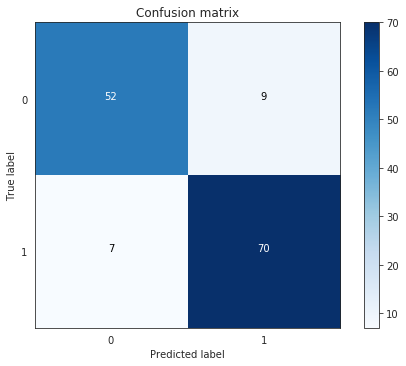

In [50]:
cm = confusion_matrix(ytest,ypredRF)

#bukan make index untuk akses confusion matrix. 
print("Recall =", round(cm[1,1]/(cm[1,0]+cm[1,1]),2))
print("Precision =",round(cm[1,1]/(cm[0,1]+cm[1,1]),2))
print("Accuracy=",(cm[1,1]+cm[0,0])/(cm[1,1]+cm[0,0]+cm[1,0]+cm[0,1]) )
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [51]:
#RANDOM FOREST
from sklearn.metrics import classification_report
print(classification_report(ytest,ypredRF))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        61
           1       0.89      0.91      0.90        77

   micro avg       0.88      0.88      0.88       138
   macro avg       0.88      0.88      0.88       138
weighted avg       0.88      0.88      0.88       138



In [149]:
#K-NN
from sklearn.metrics import classification_report
print(classification_report(ytest,ypredKNN))

              precision    recall  f1-score   support

           0       0.91      0.79      0.84        61
           1       0.85      0.94      0.89        77

   micro avg       0.87      0.87      0.87       138
   macro avg       0.88      0.86      0.87       138
weighted avg       0.87      0.87      0.87       138



In [150]:
#SVC
from sklearn.metrics import classification_report
print(classification_report(ytest,ypredSVC))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85        61
           1       0.95      0.78      0.86        77

   micro avg       0.86      0.86      0.86       138
   macro avg       0.86      0.87      0.86       138
weighted avg       0.87      0.86      0.86       138



In [151]:
#DT
from sklearn.metrics import classification_report
print(classification_report(ytest,ypredDT))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84        61
           1       0.87      0.88      0.88        77

   micro avg       0.86      0.86      0.86       138
   macro avg       0.86      0.86      0.86       138
weighted avg       0.86      0.86      0.86       138



    - Precision: TruePost/ ( TruePost + FalsePost)
    - Recall : TruePost/ (TruePost+FalseNeg)
    
    untuk membandingkan nilai precision&recall kita bisa menggunakan nilai F1 Score:
    2(Precision x Revall)/(Precision + Recall)

## Algoritma
    
Algoritma yang akan terapkan adalah algoritma yang terbaik berdasarkan hasil evaluasi. Berikut beberapa pertimbangan yang saya miliki:
    
1. Berdasarkan Receiver Operating Characteristic Curve (ROC Curve), Area Under The Curve (AUC) terluas dimiliki oleh algoritma Random Forest dengan ROC 0.88. <br><br>
    
2. Berdasarkan nilai F1-Score yang digunakan untuk membandingkan nilai precision&recall antar algoritma, Random Forest memiliki nilai tertinggi. <br><br>
    
3. untuk menghasilkan algoritma yang 'robust to outlier' akan lebih baik jika menggunakan algoritma Decision Tree ataupun Random Forest. Karena kedua algoritma tersebut mendukung adanya penggunaan data outlier pada data tahap training data. Cara kerja algoritma tersebut adalah dengan membagi beberapa point data berdasarkan garis. jadi ini tidak berpengaruh terhadap seberapa jauh point dari garis nya dan tidak akan mempengaruhi jika data outlier tersebut tidak dihapus, menimbang perlunya banyak data yang digunakan untuk proses training data. berikut ilustrasinya:
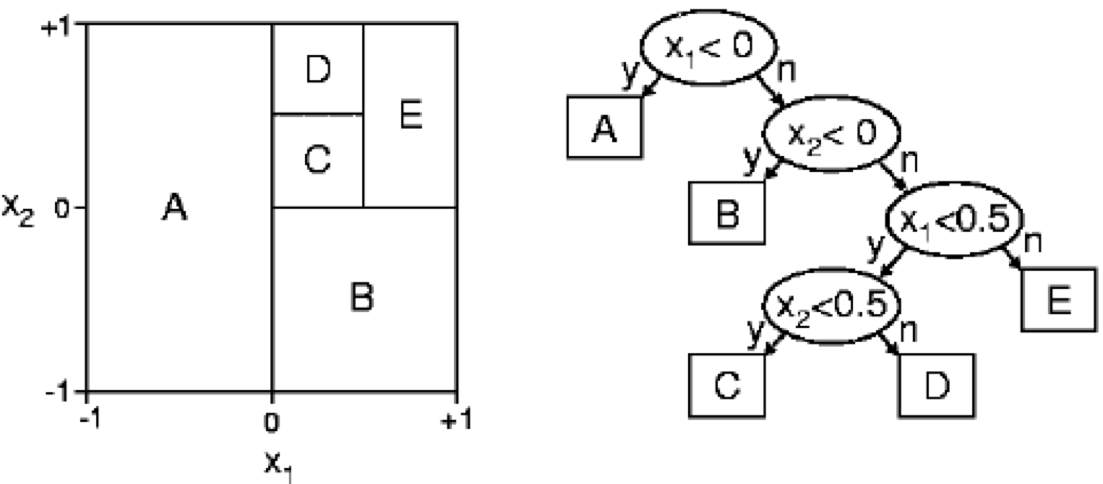

In [1]:
# from IPython.core.display import Image
# Image(filename='DTRF.png')